# Classification Project
## Salaries prediction with 'Adult' dataset <br>

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br><br>


Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Adult

#### Data Set Information: 
Extraction was done by Barry Becker from the 1994 Census database. Prediction task is to determine whether a person makes over 50K a year. <br>

### Attribute Information: 

<b>age:</b> <br>
Continuous. <br>

<b>workclass:</b> <br>
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. <br>

<b>fnlwgt:</b> <br>
Continuous. Final weight, which is the number of units in the target population that the responding unit represents. <br>

<b>education:</b> <br>
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>

<b>education-num:</b> <br>
Continuous. : The highest level of education achieved in numerical form. <br>

<b>marital-status:</b> <br>
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>

<b>occupation:</b> <br>
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>

<b>relationship:</b> <br>
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>

<b>race:</b> <br>
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>

<b>sex:</b> <br>
Female, Male. <br>

<b>capital-gain:</b> <br>
Capital gains for an individual. Continuous. <br>

<b>capital-loss:</b> <br>
Capital loss for an individual. Continuous. <br>

<b>hours-per-week:</b> <br>
Continuous. <br>

<b>native-country:</b> <br>
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Basic libraries:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk

Quick fix for the dark theme plotting to have readable labels:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Importing the data:

Training data:

In [3]:
df_training_original = pd.read_csv('training.data', 
                          names=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])

Test data:

In [4]:
df_test_original = pd.read_csv('test.test', 
                          names=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])

Making a copy of the original imported data:

In [5]:
df_test = df_test_original.copy()
df_training = df_training_original.copy()

Check the data:

In [6]:
df_training

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df_test

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Exploratory Data Analysis (EDA):

Training data:

In [8]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Week-Hours      32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Test data:

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   FNLWGT          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-num   16281 non-null  int64 
 5   Marital-status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-gain    16281 non-null  int64 
 11  Capital-loss    16281 non-null  int64 
 12  Week-Hours      16281 non-null  int64 
 13  Native-country  16281 non-null  object
 14  Salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Descriptions of basic statistics:

In [10]:
df_training.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df_test.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


Basic check for missing values (further checks will show that there actually ARE missing values, just marked with "?" as a placeholder):

In [12]:
df_training.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

In [13]:
df_test.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

Correlation between the variables:

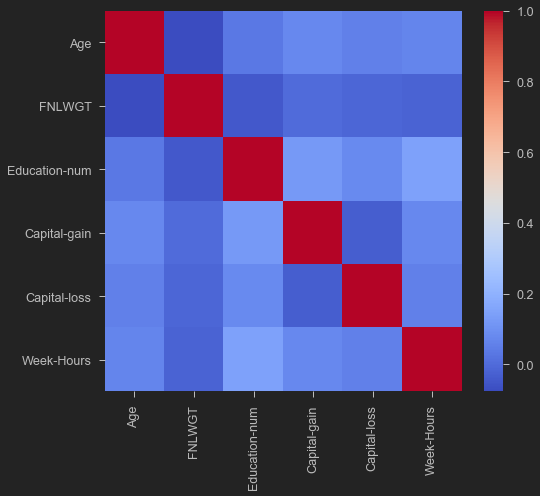

In [14]:
sns.heatmap(df_training.corr(), cmap='coolwarm')

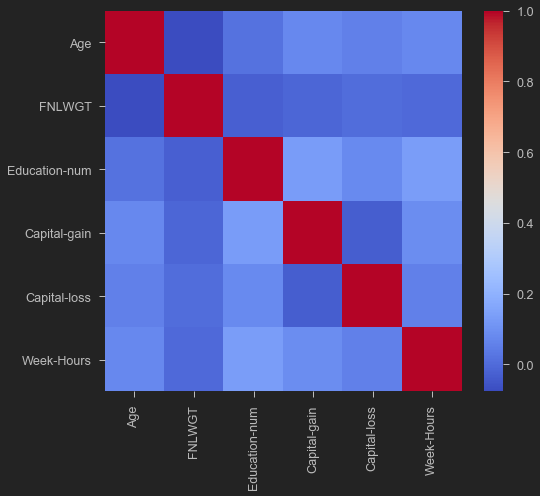

In [15]:
sns.heatmap(df_test.corr(), cmap='coolwarm')

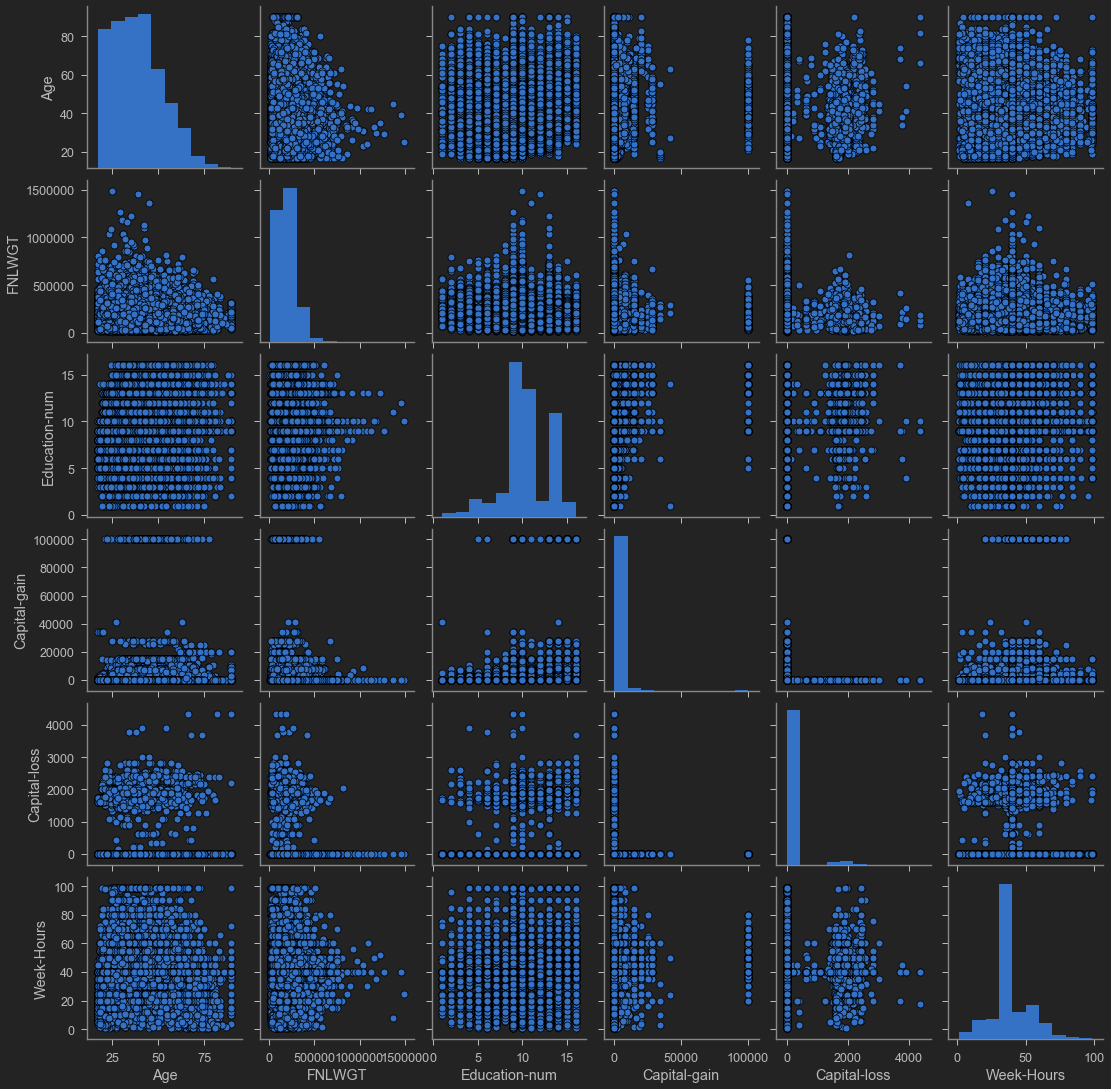

In [52]:
sns.pairplot(df_training, plot_kws=dict(edgecolor="black"))

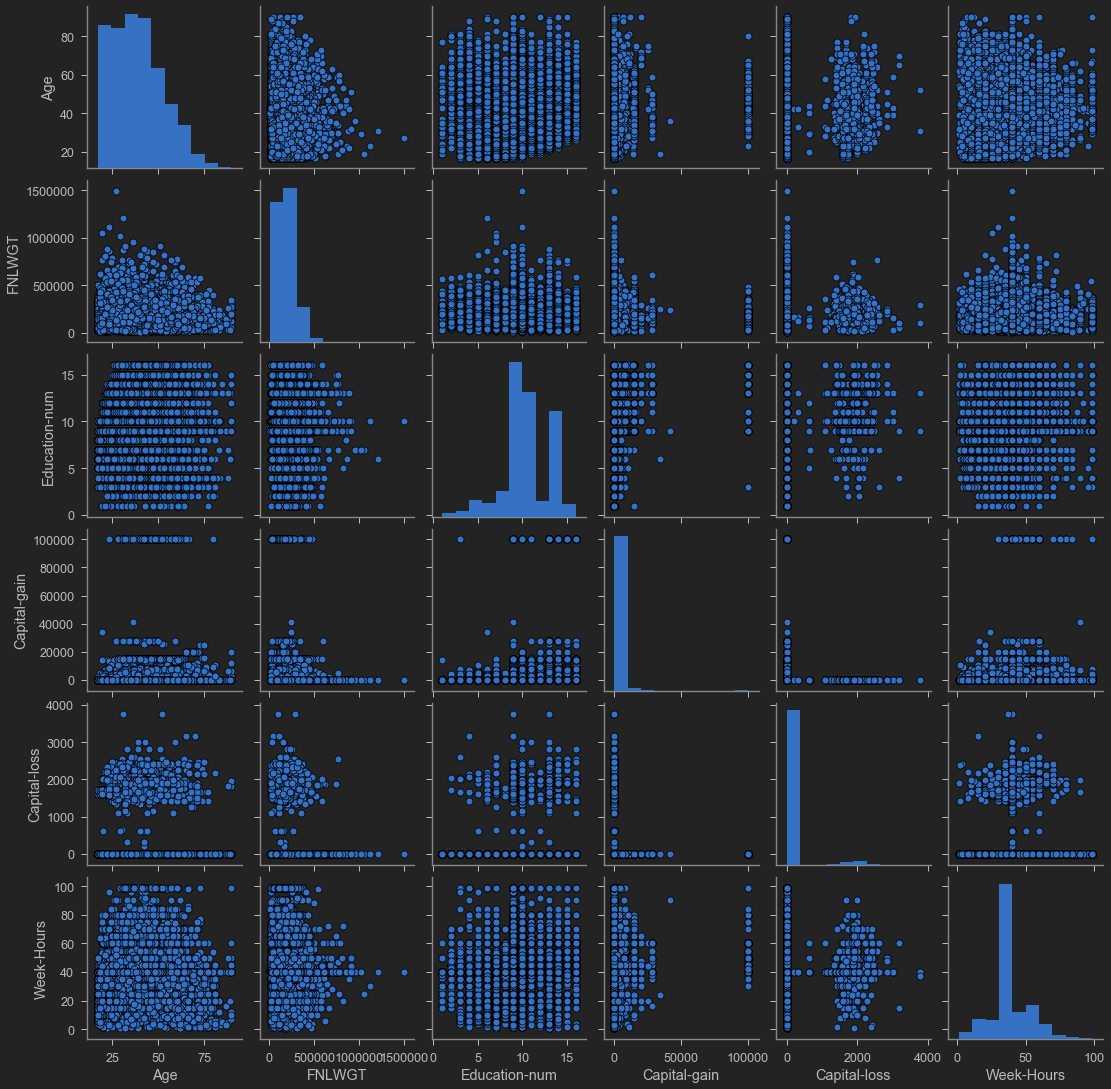

In [53]:
sns.pairplot(df_test, plot_kws=dict(edgecolor="black"))

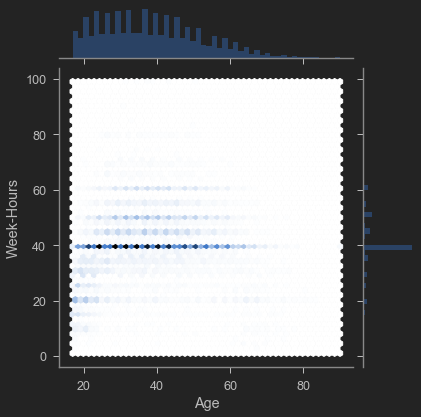

In [18]:
sns.jointplot(x='Age',y='Week-Hours',data=df_training, kind='hex');

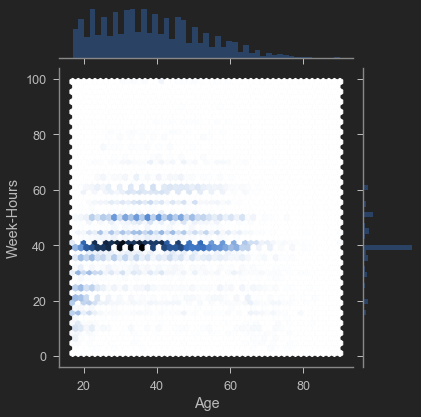

In [19]:
sns.jointplot(x='Age',y='Week-Hours',data=df_test, kind='hex');

The dataset split provided is reasonable. The test set takes up ~33% of all the data and is <u>representative</u>.

## Concatenating Training and Test sets
For clarity and consistent pre-processing I decided to temporary concatenate training and test dataframes that initially came separately from UCI. I will split them again before the training.

In [20]:
#Test set:
#df.iloc[32561:,:]

In [285]:
df = pd.concat([df_training, df_test], ignore_index=True)

## Missing data
Even though there are no missing values from .isnull() and .info() methods we can see "?" in some cells. 
Although the data is theoretically indeed not missing there, the "?" placeholder does not add any value. There can be many different placeholders so just searching for "?" might not be sufficient. Let's inspect the columns for suspicious values:

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   FNLWGT          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-num   48842 non-null  int64 
 5   Marital-status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital-gain    48842 non-null  int64 
 11  Capital-loss    48842 non-null  int64 
 12  Week-Hours      48842 non-null  int64 
 13  Native-country  48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Age

In [287]:
df['Age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87, 89], dtype=int64)

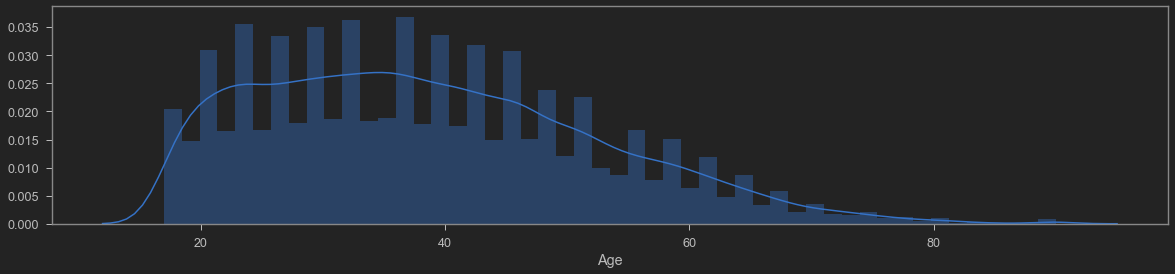

In [288]:
plt.figure(figsize=(20,4))
sns.distplot(df['Age'])

The largest group of representants are people in their 30s:

In [289]:
df['Age'].mode().head(3)

0    36
dtype: int64

### Work class

In [290]:
df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

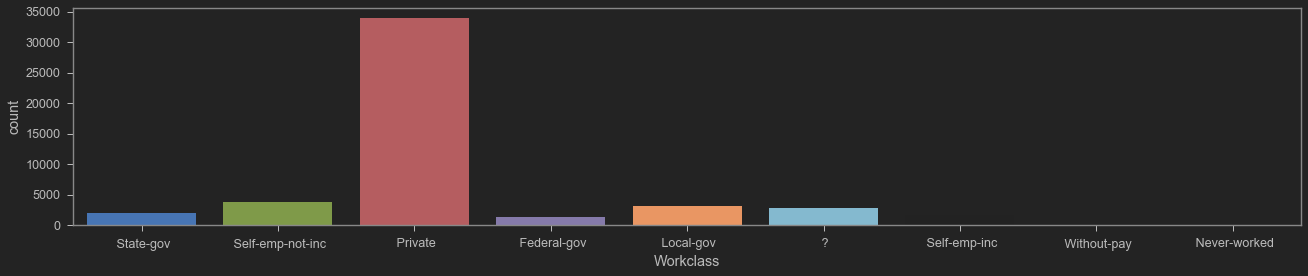

In [291]:
plt.figure(figsize=(22,4))
sns.countplot(df['Workclass'])

### Education:

In [379]:
df['Education'].sort_values().unique()

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

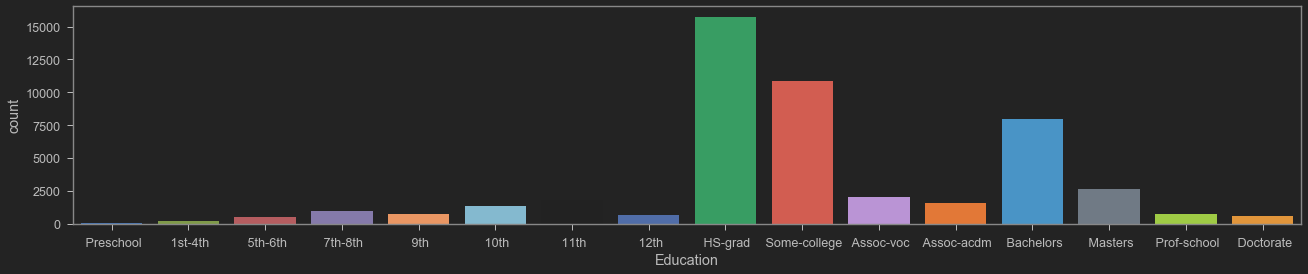

In [388]:
plt.figure(figsize=(22,4))
sns.countplot(df['Education'],
              order=[' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad', 
                     ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'])

### Education number

In [294]:
df['Education-num'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

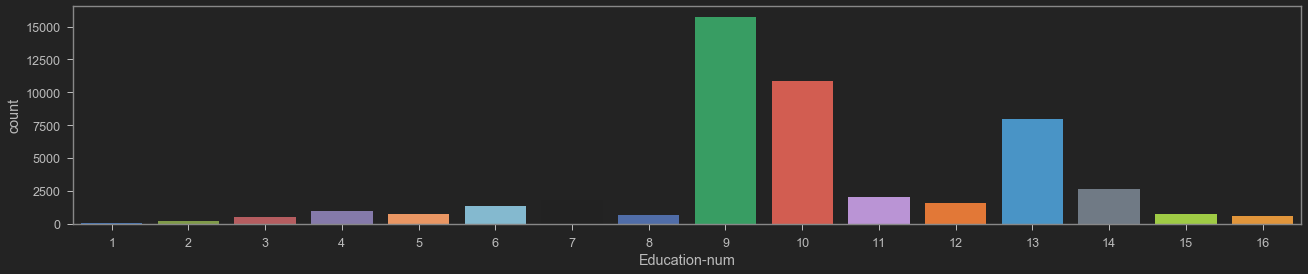

In [377]:
plt.figure(figsize=(22,4))
sns.countplot(df['Education-num'])

### Marital status

In [296]:
df['Marital-status'].sort_values().unique()

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

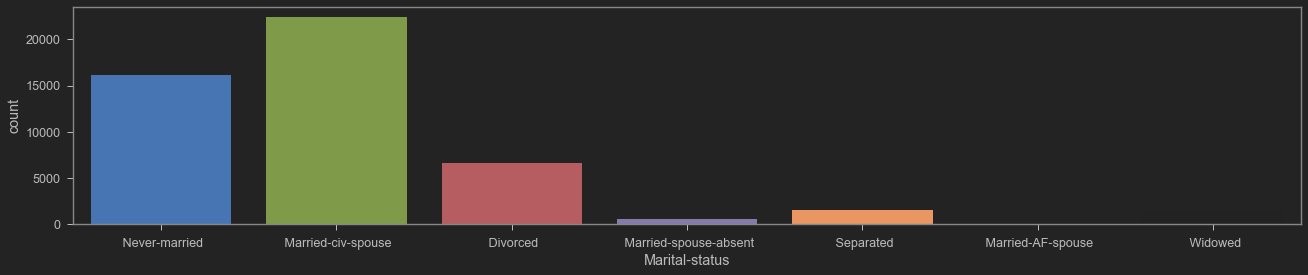

In [297]:
plt.figure(figsize=(22,4))
sns.countplot(df['Marital-status'])

### Occupation:

In [298]:
df['Occupation'].sort_values().unique()

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

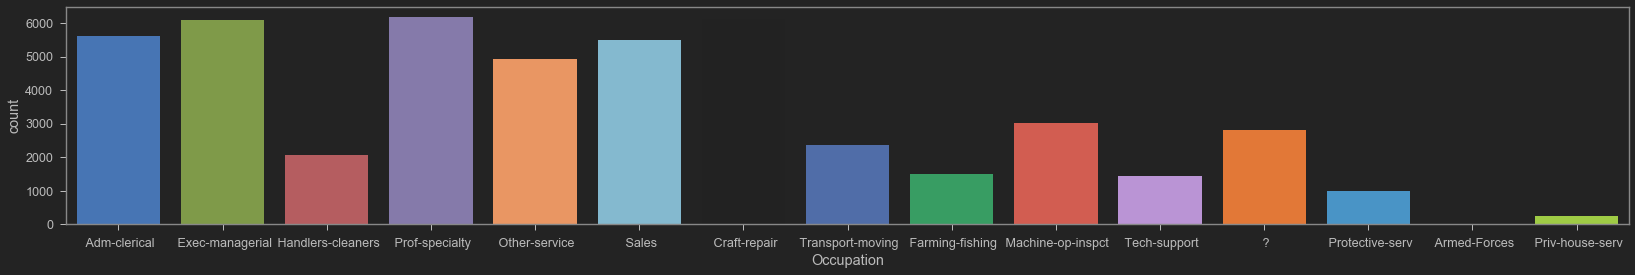

In [299]:
plt.figure(figsize=(28,4))
sns.countplot(df['Occupation'])

### Relationship

In [300]:
df['Relationship'].sort_values().unique()

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

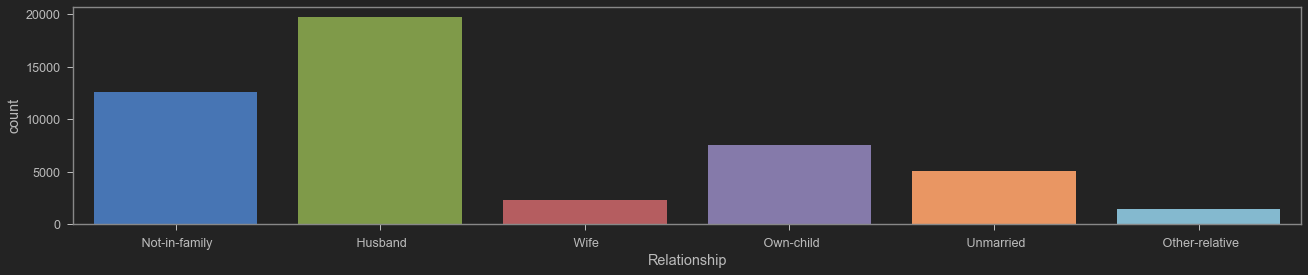

In [301]:
plt.figure(figsize=(22,4))
sns.countplot(df['Relationship'])

### Race:

In [302]:
df['Race'].sort_values().unique()

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

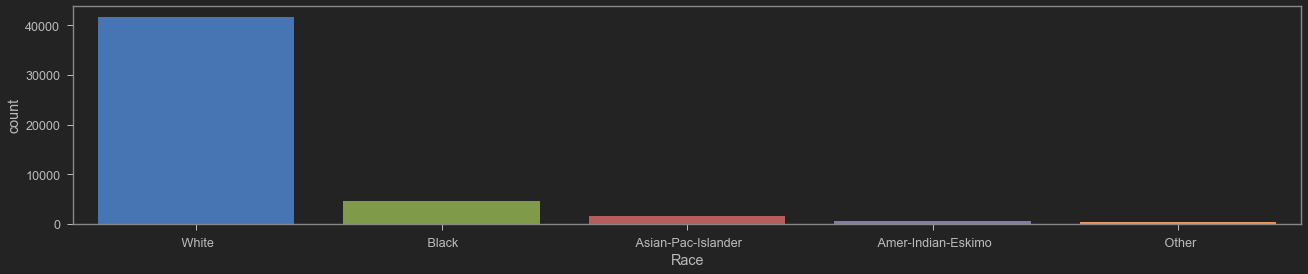

In [303]:
plt.figure(figsize=(22,4))
sns.countplot(df['Race'])

### Sex:

In [304]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

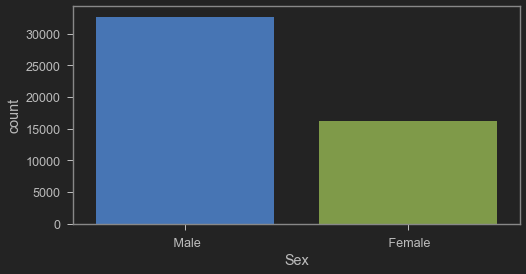

In [305]:
plt.figure(figsize=(8,4))
sns.countplot(df['Sex'])

### Capital gain:

In [306]:
df['Capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060,  1264,  7262,  1731,  6612], dtype=int64)

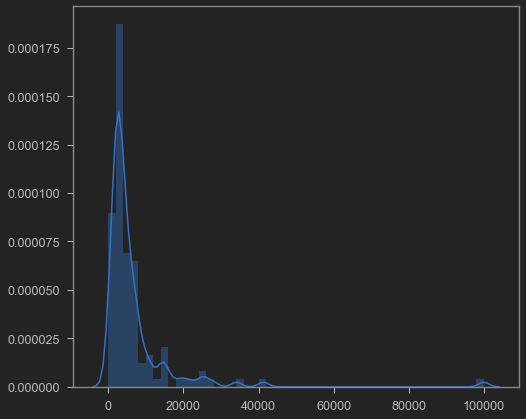

In [307]:
sns.distplot(df['Capital-gain'].unique())

In [308]:
df[df['Capital-gain'] == 99999].count()

Age               244
Workclass         244
FNLWGT            244
Education         244
Education-num     244
Marital-status    244
Occupation        244
Relationship      244
Race              244
Sex               244
Capital-gain      244
Capital-loss      244
Week-Hours        244
Native-country    244
Salary            244
dtype: int64

Whereas 0s are possible, the 244 instances of 99999s look suspicious and are probably just a placeholder for missing values.

In [309]:
df[df['Capital-gain'] == 0].count()

Age               44807
Workclass         44807
FNLWGT            44807
Education         44807
Education-num     44807
Marital-status    44807
Occupation        44807
Relationship      44807
Race              44807
Sex               44807
Capital-gain      44807
Capital-loss      44807
Week-Hours        44807
Native-country    44807
Salary            44807
dtype: int64

In [310]:
df[df['Capital-gain'] == 0]['Age'].count()/df['Age'].count()

0.9173866754023177

92% of the people had Capital-gain = 0.

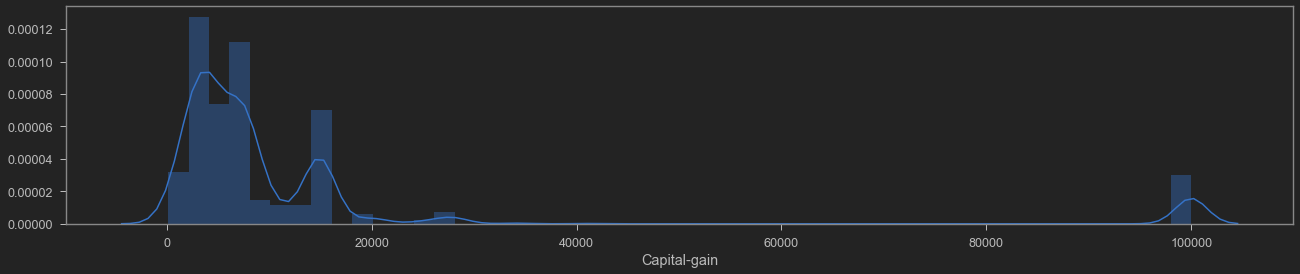

In [311]:
plt.figure(figsize=(22,4))
sns.distplot(df[df['Capital-gain'] > 0]['Capital-gain'])

Checking where are located the faulty 99999s. Let's remember I concatenated earlier the test set (rows ~32000-48000):

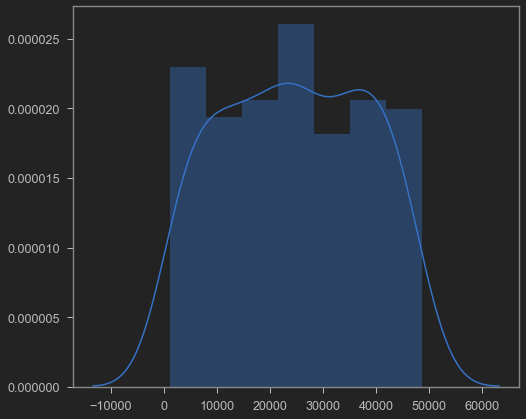

In [312]:
sns.distplot(df[df['Capital-gain'] == 99999].index)

#### Removing rows, where Capital-gain = 99999:

In [313]:
df.drop(df[df['Capital-gain'] == 99999].index, inplace=True)

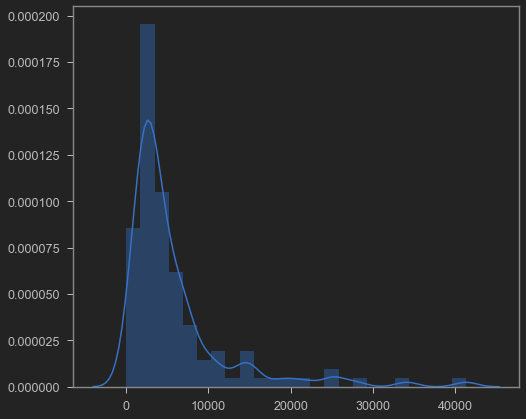

In [314]:
sns.distplot(df['Capital-gain'].unique())

### Capital loss:

In [315]:
df['Capital-loss'].value_counts()

0       46316
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: Capital-loss, Length: 99, dtype: int64

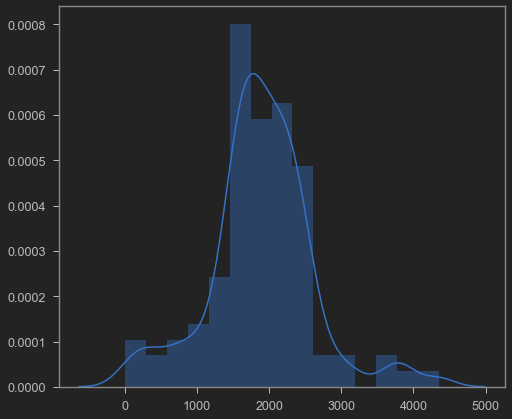

In [316]:
sns.distplot(df['Capital-loss'].unique())

### Work hours per week

In [317]:
df['Week-Hours'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99], dtype=int64)

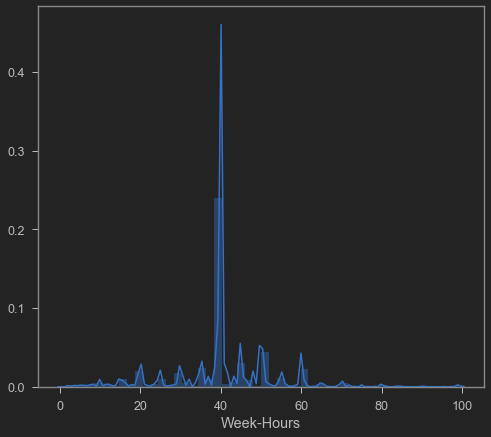

In [318]:
sns.distplot(df['Week-Hours'])

It is very unlikely someone works (especially effectively) 99 hours per week but let's assume they are <u>not</u> missing values but rather outliers.

In [319]:
df[df['Week-Hours'] == 99]

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
935,37,Private,176900,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,>50K
1172,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
3578,37,Self-emp-inc,382802,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,>50K
4086,50,?,174964,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47050,31,?,170513,HS-grad,9,Divorced,?,Not-in-family,White,Female,0,0,99,United-States,<=50K.
47107,32,State-gov,246282,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,2961,0,99,?,<=50K.
47376,49,?,111282,7th-8th,4,Married-civ-spouse,?,Husband,White,Male,4386,0,99,United-States,>50K.
47760,48,Private,250736,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K.


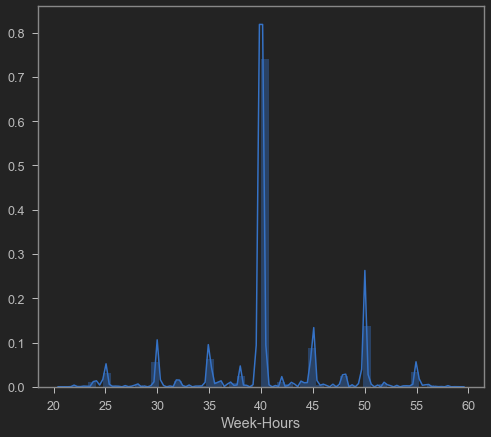

In [320]:
sns.distplot(df[(df['Week-Hours'] > 20) & (df['Week-Hours'] < 60)]['Week-Hours'])

It looks like 50-hour wokring week is the second most common weekly worktime. 

### Native country:

In [321]:
df['Native-country'].sort_values().unique()

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia'], dtype=object)

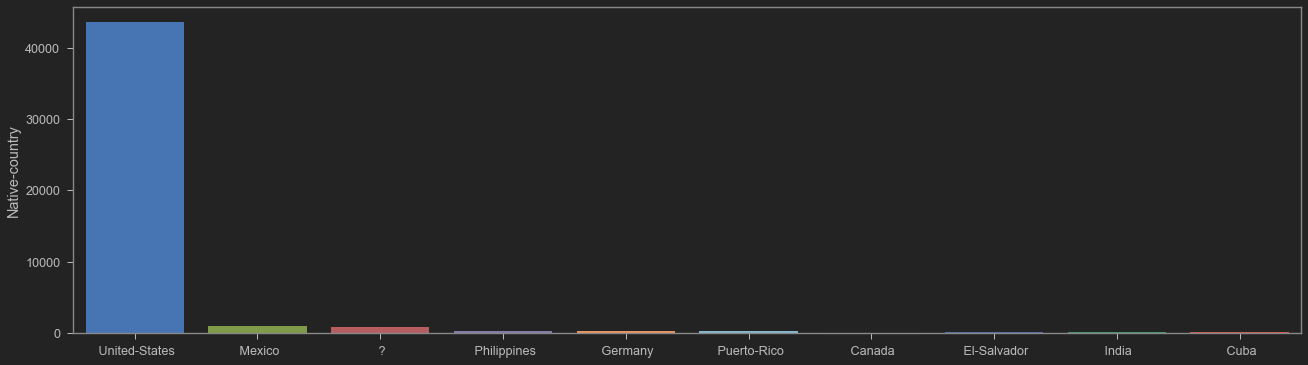

In [322]:
plt.figure(figsize=(22,6))
sns.barplot(x=df['Native-country'].value_counts().head(10).index, y=df['Native-country'].value_counts().head(10))

The vast majority comes from USA.

### Salary (dependent variable):

In [323]:
df['Salary'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

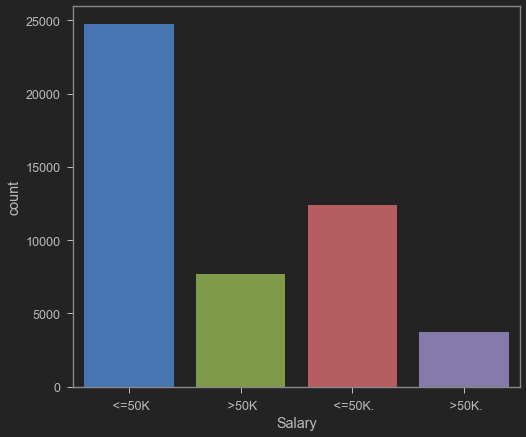

In [324]:
sns.countplot(df['Salary'])

In [325]:
d = {' <=50K': 0, ' <=50K.': 0, ' >50K': 1,' >50K.': 1}

df['Salary'] = df['Salary'].map(d)

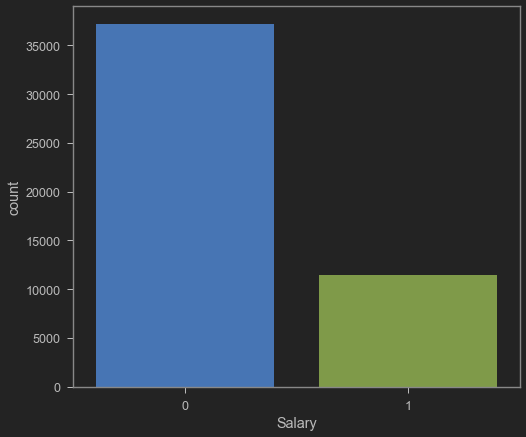

In [326]:
sns.countplot(df['Salary'])

## Replace "?" with NaN

In [328]:
df = df.replace({' ?': np.nan})

In [329]:
df

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


## Inspecting really missing values:

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48598 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48598 non-null  int64 
 1   Workclass       45804 non-null  object
 2   FNLWGT          48598 non-null  int64 
 3   Education       48598 non-null  object
 4   Education-num   48598 non-null  int64 
 5   Marital-status  48598 non-null  object
 6   Occupation      45794 non-null  object
 7   Relationship    48598 non-null  object
 8   Race            48598 non-null  object
 9   Sex             48598 non-null  object
 10  Capital-gain    48598 non-null  int64 
 11  Capital-loss    48598 non-null  int64 
 12  Week-Hours      48598 non-null  int64 
 13  Native-country  47751 non-null  object
 14  Salary          48598 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 7.2+ MB


In [331]:
df.isnull().sum()

Age                  0
Workclass         2794
FNLWGT               0
Education            0
Education-num        0
Marital-status       0
Occupation        2804
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Week-Hours           0
Native-country     847
Salary               0
dtype: int64

### Rows with missing values:

In conclusion, there are missing values in the following columns: 'Workclass', 'Occupation', 'Native-country'. The rows are exactly:

In [334]:
df[df.isnull().any(axis=1)]

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,1
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,0
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,0
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,0
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,1


## Categorical Imputing using SimpleImputer
Using "most frequent" value method in this case: <br>
Note: SimpleImputer returns an array and we loose column types (to be adressed a few lines below):

In [363]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
df_filled = imputer.fit_transform(df)

df = pd.DataFrame(df_filled, columns=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])
df

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48593,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48594,64,Private,321403,HS-grad,9,Widowed,Craft-repair,Other-relative,Black,Male,0,0,40,United-States,0
48595,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48596,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


Simple Imputer gives back a numpy array. Re-initializing a new dataframe results in loosing the dtypes of the initial columns:

In [364]:
df.dtypes

Age               object
Workclass         object
FNLWGT            object
Education         object
Education-num     object
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain      object
Capital-loss      object
Week-Hours        object
Native-country    object
Salary            object
dtype: object

Assigning back the numerical columns so that e.g. mean() etc. can be used:

In [365]:
df['Age'] = df['Age'].astype(int)
df['FNLWGT'] = df['FNLWGT'].astype(int)
df['Education-num'] = df['Education-num'].astype(int)
df['Capital-gain'] = df['Capital-gain'].astype(int)
df['Capital-loss'] = df['Capital-loss'].astype(int)
df['Week-Hours'] = df['Week-Hours'].astype(int)

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48598 entries, 0 to 48597
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48598 non-null  int32 
 1   Workclass       48598 non-null  object
 2   FNLWGT          48598 non-null  int32 
 3   Education       48598 non-null  object
 4   Education-num   48598 non-null  int32 
 5   Marital-status  48598 non-null  object
 6   Occupation      48598 non-null  object
 7   Relationship    48598 non-null  object
 8   Race            48598 non-null  object
 9   Sex             48598 non-null  object
 10  Capital-gain    48598 non-null  int32 
 11  Capital-loss    48598 non-null  int32 
 12  Week-Hours      48598 non-null  int32 
 13  Native-country  48598 non-null  object
 14  Salary          48598 non-null  object
dtypes: int32(6), object(9)
memory usage: 4.4+ MB


## Data exploration:

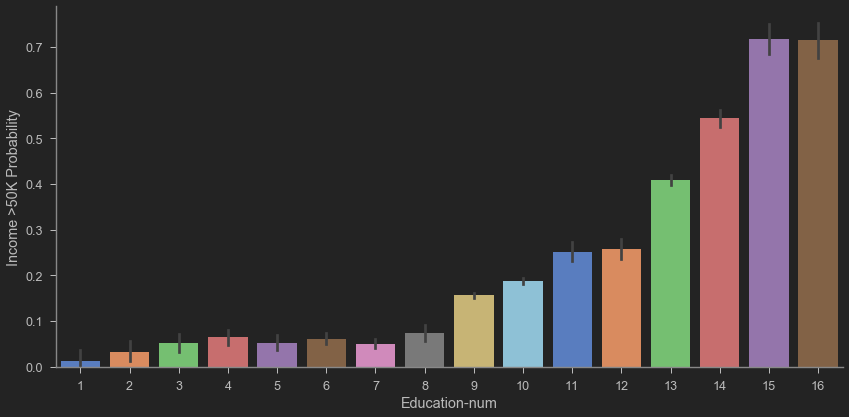

In [367]:
g = sns.catplot(x="Education-num", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=2,
                   palette = "muted");

g = g.set_ylabels("Income >50K Probability");

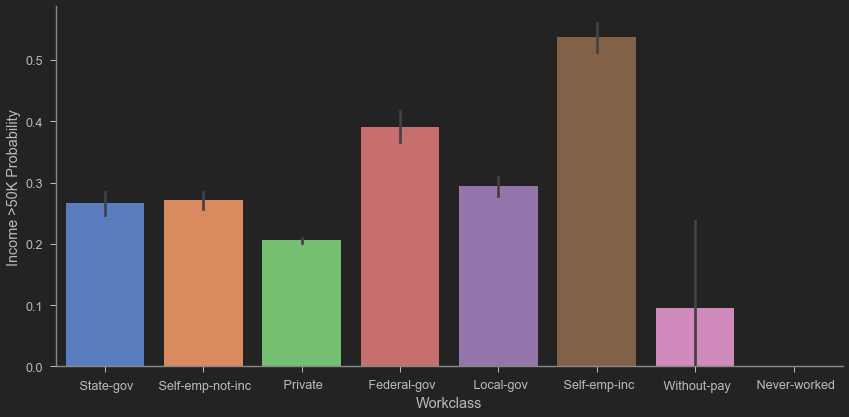

In [368]:
g = sns.catplot(x="Workclass", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=2, 
                   palette='muted');

g = g.set_ylabels("Income >50K Probability");

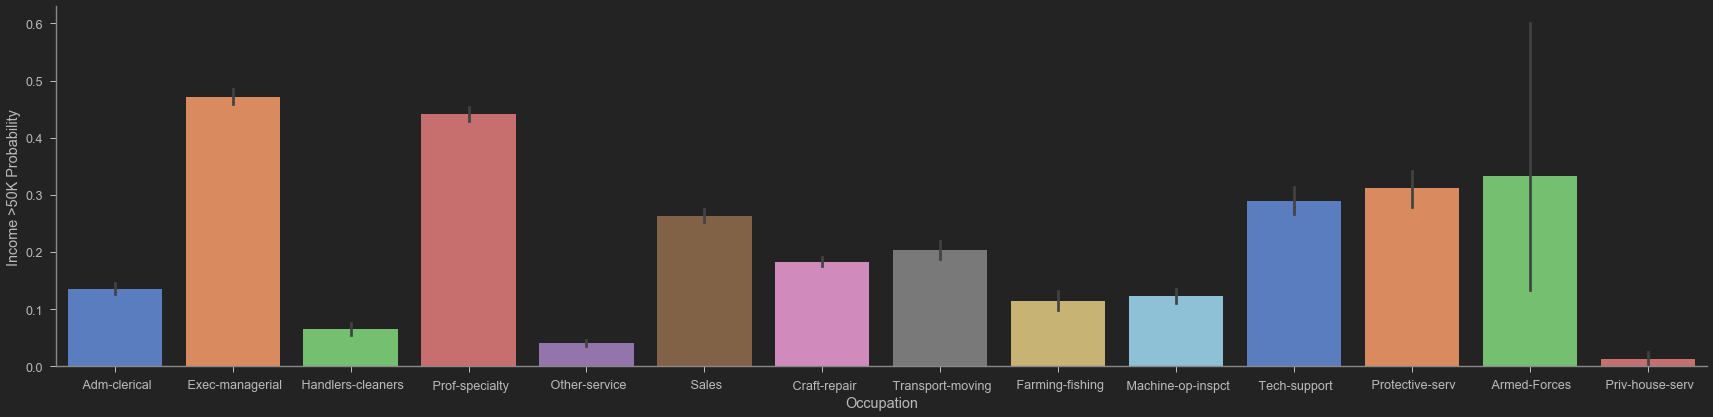

In [369]:
g = sns.catplot(x="Occupation", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=4, 
                   palette='muted');

g = g.set_ylabels("Income >50K Probability");

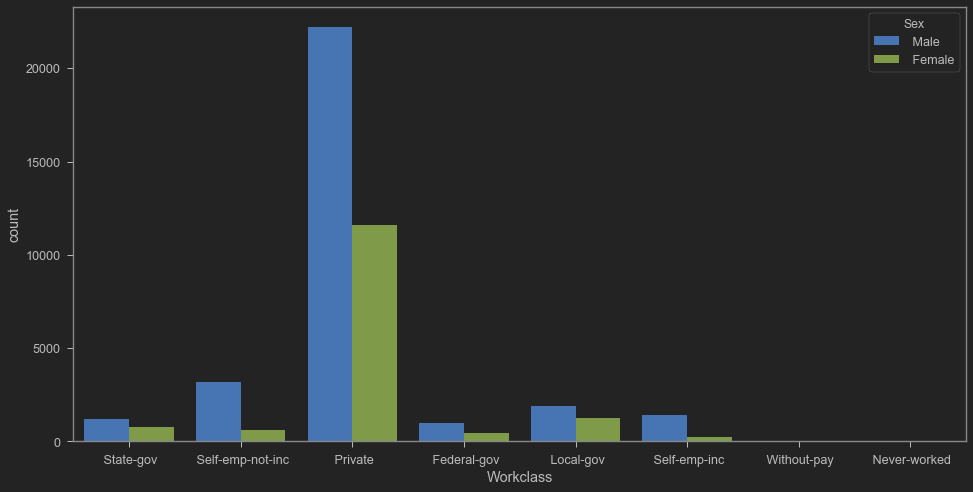

In [359]:
plt.figure(figsize=(16,8))
sns.countplot(df['Workclass'], hue=df['Sex'])

The dataset represent mostly men, employed in private companies.

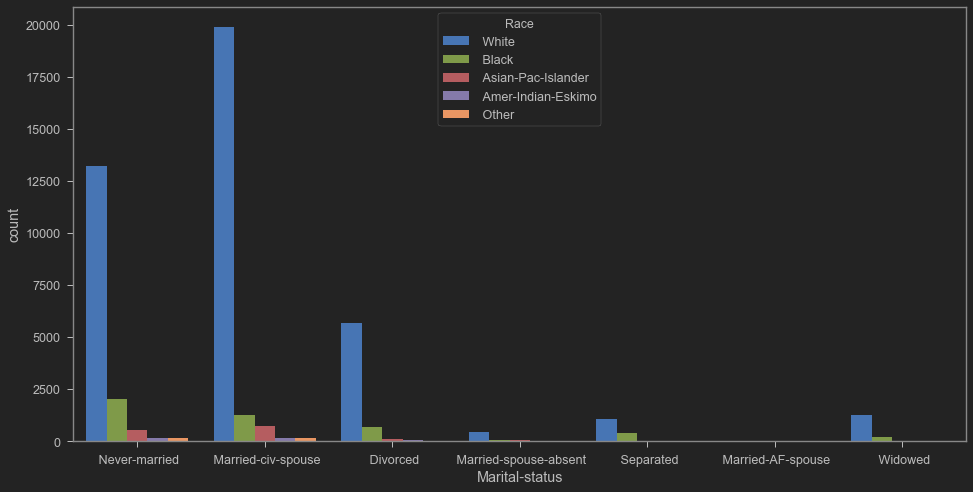

In [360]:
plt.figure(figsize=(16,8))
sns.countplot(df['Marital-status'], hue=df['Race'])

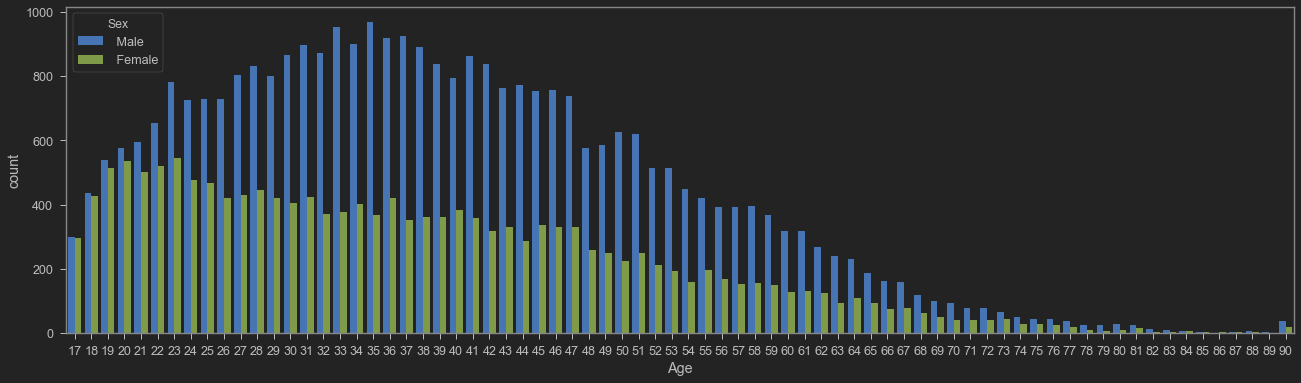

In [361]:
plt.figure(figsize=(22,6))
sns.countplot(df['Age'], hue=df['Sex'])

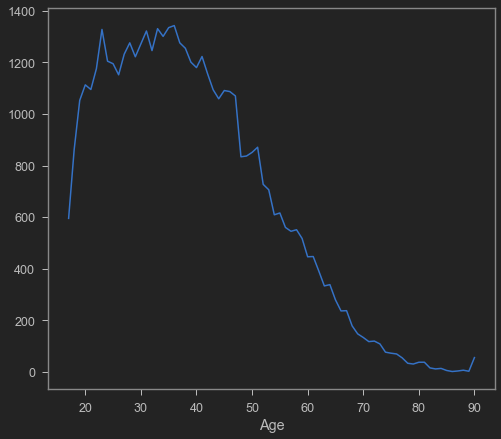

In [362]:
df.groupby('Age')['Salary'].count().plot()

The dataset is dominated by young people between 20 and 40 years.

### Scaling the data
Not a must in logistic regression. Needed for KNN, SVM and Kernel-SVM because they are distance-based.